# Problem wieloplecakowy

## Import bibliotek

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns
from time import process_time
from sklearn.linear_model import LinearRegression

## Algorytm

Dodatkowe funkcje

In [5]:
def my_max(item1, item2):
    if item1 > item2: return item1
    else: return item2

def my_index(lst, el):
    for i, item in enumerate(lst):
        if item == el:
            return i
    raise ValueError(f"element not in list")

def my_sum(lst):
    suma = 0
    for i in range(len(lst)):
        suma+=i
    return suma

def make_blank_list(n):
    lst = []
    for _ in range(n):
        lst.append([])
    return lst

def make_dp_list(n,T):
    dp = []
    for _ in range(n + 1):
        inner = []
        for _ in range(T + 1):
            inner.append(0)
        dp.append(inner)
    return dp
    
def my_random(n,times,m,T):
    if n == None:
        n = rd.randint(1, 100)
    if m == None:
        m = rd.randint(1, 10)
    if times == None:
        times = [rd.randrange(1, 5) for i in range(n)]
    if T == None:
        T = rd.randrange(2, 8)
    

In [42]:
def MultiKnapsack(n = None, m = None, times = None, T = None):
    
    # Default arguments if not provided
    my_random(n,times,m,T)
    
    # Creating empty schedule
    employer_schedule = make_blank_list(m)
    employer_times = make_blank_list(m)

    # Going over each employer
    for employer in range(m):
        dp = make_dp_list(n,T)
        for i in range(1, n + 1):                                      
            for w in range(T + 1):
                if times[i-1] == 0 or times[i-1] > w :
                    dp[i][w] = dp[i - 1][w]
                else:                                                  
                    dp[i][w] = my_max(dp[i - 1][w], dp[i - 1][w - times[i - 1]] + 1)
        # Schedule for each employer
        w = T
        j = m-1-employer
        for i in range(n, 0, -1):
            if dp[i][w] != dp[i - 1][w]:
                w -= times[i - 1] 
                if my_sum(employer_times[j])+times[i - 1] <= T and times[i-1] != 0:
                    employer_times[j].append(times[i-1])
                    employer_schedule[j].append(i)
                    
        # Removing already delegated orders
        to_remove = employer_times[j]
        for el in to_remove: 
            index = my_index(times,el)
            times[index] = 0
        # End of iteration for a single employer
            
    return employer_schedule,dp

In [43]:
e, dp = employer_schedule = MultiKnapsack(4, 2, [2,2,4,1], 4)
e

[[3], [2, 1]]

## Badanie szybkości wykonania

### Heatmapa w zależności od liczby zamówień i pracowników

In [82]:
time_table = [[0 for i in range(10)] for j in range(10)]

for i in range(1, 11):
    for j in range(1, 11):
        start = process_time()
        for k in range(1000):
            MultiKnapsack(n = 10*i, m = j, T = 8)
        stop = process_time()
        time_table[i-1][j-1] = stop - start

print(time_table)

[[0.078125, 0.125, 0.1875, 0.265625, 0.3125, 0.390625, 0.5, 0.59375, 0.578125, 0.90625], [0.1875, 0.25, 0.328125, 0.53125, 0.578125, 0.734375, 0.921875, 1.078125, 1.09375, 1.34375], [0.1875, 0.3125, 0.546875, 0.765625, 0.828125, 1.21875, 1.34375, 1.40625, 1.71875, 1.890625], [0.234375, 0.421875, 0.640625, 0.859375, 1.140625, 1.53125, 1.75, 2.0, 2.65625, 2.5], [0.28125, 0.609375, 0.78125, 1.234375, 1.5, 1.75, 2.03125, 2.453125, 2.6875, 3.0], [0.328125, 0.65625, 0.9375, 1.40625, 1.765625, 2.0625, 2.53125, 2.8125, 3.109375, 3.796875], [0.53125, 1.03125, 1.28125, 1.65625, 1.953125, 2.546875, 2.9375, 3.46875, 3.59375, 4.375], [0.5, 0.96875, 1.265625, 1.875, 2.484375, 2.96875, 3.375, 3.75, 4.25, 4.90625], [0.5, 1.015625, 1.46875, 1.890625, 2.484375, 2.90625, 3.546875, 4.578125, 5.015625, 5.625], [0.578125, 1.25, 1.609375, 2.40625, 3.109375, 4.015625, 5.375, 4.609375, 5.296875, 5.9375]]


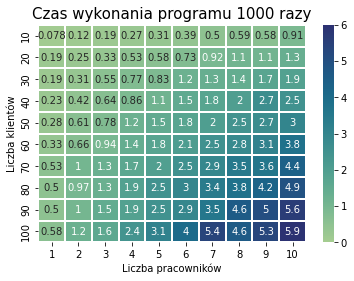

In [102]:
ax = sns.heatmap(time_table, linewidths=0.2, annot=True, cmap='crest', vmin=0, vmax=6,
                 xticklabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], 
                 yticklabels=['10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
ax.set(xlabel = 'Liczba pracowników', ylabel = 'Liczba klientów')
ax.set_title('Czas wykonania programu 1000 razy', fontsize = 15)
plt.show()

### Próba empirycznego zbadania złożoności obliczeniowej w zależności od liczby zamówień

In [24]:
time_table = [0 for i in range(100)]

for i in range(1, 101):
    start = process_time()
    for k in range(1000):
         MultiKnapsack(n = i, m = 10, T = 8)
    stop = process_time()
    time_table[i-1] = stop - start

print(time_table)

[0.09375, 0.15625, 0.203125, 0.296875, 0.328125, 0.4375, 0.53125, 0.546875, 0.59375, 0.640625, 0.765625, 0.765625, 0.859375, 1.0625, 1.015625, 1.046875, 1.109375, 1.390625, 1.203125, 1.21875, 1.296875, 1.40625, 1.421875, 1.578125, 1.53125, 1.8125, 1.78125, 1.8125, 2.03125, 1.984375, 1.859375, 2.109375, 2.03125, 2.046875, 2.328125, 2.0625, 2.171875, 2.34375, 2.234375, 2.453125, 2.609375, 2.5625, 2.515625, 2.609375, 2.78125, 2.8125, 2.875, 2.765625, 2.890625, 3.0625, 3.1875, 3.015625, 3.265625, 3.21875, 3.171875, 3.234375, 3.28125, 3.65625, 3.265625, 3.5625, 3.9375, 3.78125, 3.875, 3.71875, 3.875, 4.109375, 3.71875, 4.03125, 3.90625, 4.34375, 4.046875, 4.09375, 4.515625, 3.921875, 4.203125, 4.734375, 4.4375, 4.765625, 4.390625, 4.640625, 4.4375, 4.640625, 4.75, 4.96875, 5.0625, 4.71875, 4.6875, 4.921875, 5.328125, 6.484375, 5.921875, 5.96875, 8.4375, 7.984375, 5.796875, 5.171875, 5.28125, 5.34375, 5.5625, 5.671875]


In [25]:
lm = LinearRegression()
X = np.array([i for i in range(1, 101)])
X = X.reshape(len(X), 1)
y = np.array(time_table)
y = y.reshape(len(y), 1)
lm.fit(X, y)

LinearRegression()

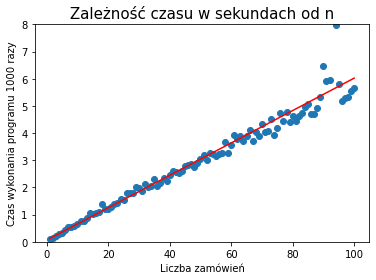

In [26]:
fig, ax = plt.subplots()
plt.scatter([i for i in range(1, 101)], time_table)
plt.plot(X, X*lm.coef_ + lm.intercept_, 'red')
ax.set(xlabel = 'Liczba zamówień', ylabel = 'Czas wykonania programu 1000 razy')
ax.set_title('Zależność czasu w sekundach od n', fontsize = 15)
ax.set_ylim(0, 8)
plt.show()

Wyszło fajnie: spróbujmy wykazać liniową zależność od pozostałych zmiennych.

### Złożoność ze względu na liczbę pracowników

In [28]:
time_table_1 = [0 for i in range(10)]

for i in range(1, 11):
    start = process_time()
    for k in range(1000):
         MultiKnapsack(n = 100, m = i, T = 8)
    stop = process_time()
    time_table_1[i-1] = stop - start

print(time_table_1)

[0.640625, 1.0625, 1.53125, 2.171875, 2.609375, 3.671875, 3.9375, 4.1875, 5.078125, 5.984375]


In [32]:
lm1 = LinearRegression()
X = np.array([i for i in range(1, 11)])
X = X.reshape(len(X), 1)
y = np.array(time_table_1)
y = y.reshape(len(y), 1)
lm1.fit(X, y)

LinearRegression()

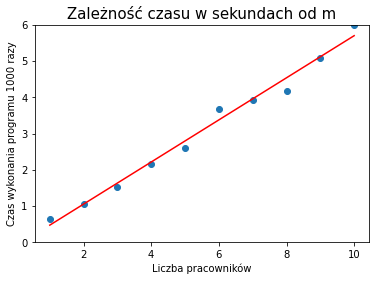

In [33]:
fig, ax = plt.subplots()
plt.scatter([i for i in range(1, 11)], time_table_1)
plt.plot(X, X*lm1.coef_ + lm1.intercept_, 'red')
ax.set(xlabel = 'Liczba pracowników', ylabel = 'Czas wykonania programu 1000 razy')
ax.set_title('Zależność czasu w sekundach od m', fontsize = 15)
ax.set_ylim(0, 6)
plt.show()

### Złożoność ze względu na czas pracy

In [34]:
time_table_2 = [0 for i in range(7)]

for i in range(2, 9):
    start = process_time()
    for k in range(1000):
         MultiKnapsack(n = 100, m = 10, T = i)
    stop = process_time()
    time_table_2[i-2] = stop - start

print(time_table_2)

[2.09375, 2.5625, 3.25, 3.46875, 4.25, 4.90625, 5.359375]


In [35]:
lm2 = LinearRegression()
X = np.array([i for i in range(2, 9)])
X = X.reshape(len(X), 1)
y = np.array(time_table_2)
y = y.reshape(len(y), 1)
lm2.fit(X, y)

LinearRegression()

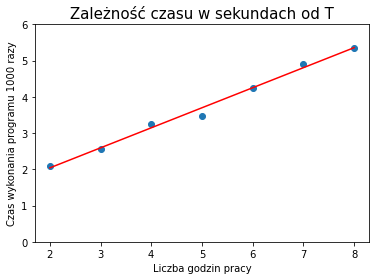

In [36]:
fig, ax = plt.subplots()
plt.scatter([i for i in range(2, 9)], time_table_2)
plt.plot(X, X*lm2.coef_ + lm2.intercept_, 'red')
ax.set(xlabel = 'Liczba godzin pracy', ylabel = 'Czas wykonania programu 1000 razy')
ax.set_title('Zależność czasu w sekundach od T', fontsize = 15)
ax.set_ylim(0, 6)
plt.show()

## Porównanie z algorytmem zachłannym pod kątem optymalności pakowania

Wprowadźmy algorytm zachłanny:

In [4]:
def knapsack(n = None, m = None, times = None, T = None):
    
    # Default arguments if not provided
    if n == None:
        n = rd.randint(1, 100)
    if m == None:
        m = rd.randint(1, 10)
    if times == None:
        times = [rd.randrange(1, 5) for i in range(n)]
    if T == None:
        T = rd.randrange(2, 8) # maybe decrease step in randranges
        
    indices = np.argsort(times)
    times = sorted(times) 

    employer_graphics = [ [] for _ in range(m)]
    employer_sum = [0 for _ in range(m)]
    employer_weights = [ [] for _ in range(m)]
    
    for i in range(0, n):                 
        employer_sum[i%m] += times[i] 
        if employer_sum[i%m] <= T:
            employer_graphics[i%m].append(indices[i] + 1)
            employer_weights[i%m].append(times[i])
    
    return employer_graphics

Przeprowadźmy eksperyment

In [34]:
zamówienia_greedy = [0 for i in range(10)]
zamówienia_dynamic = [0 for i in range(10)]

for i in range(1, 11):
    for k in range(1000):
        times = [rd.randrange(1, 5) for i in range(40)] # zawsze rozważymy 50 klientów? Można zmodyfikować eksperyment...
        greedy = knapsack(n = 40, m = i, times = times, T = 8)
        dynamic = MultiKnapsack(n = 40, m = i, times = times, T = 8)
        zamówienia_greedy[i-1] += len(sum(greedy, []))
        zamówienia_dynamic[i-1] += len(sum(dynamic, []))

print(zamówienia_greedy)
print(zamówienia_dynamic)

[7769, 12497, 16186, 19262, 21382, 24025, 26226, 28030, 29219, 30578]
[7769, 12732, 16680, 20169, 22768, 25225, 27083, 29189, 31199, 33119]


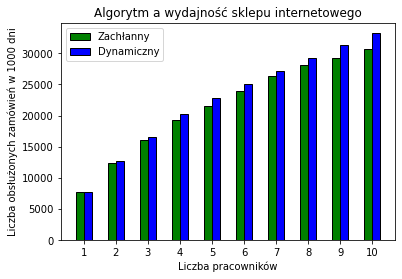

In [29]:
r = np.arange(10) 
width = 0.25    
plt.bar(r, zamówienia_greedy, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Zachłanny')

plt.bar(r + width, zamówienia_dynamic, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Dynamiczny') 
  
plt.xlabel("Liczba pracowników") 
plt.ylabel("Liczba obsłużonych zamówień w 1000 dni") 
plt.title("Algorytm a wydajność sklepu internetowego") 

plt.xticks(r + width/2, r+1) 
plt.legend() 

plt.show() 

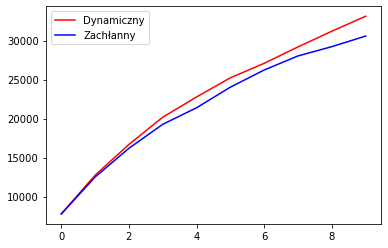

In [40]:
r = np.arange(10) 
plt.plot(np.arange(10), zamówienia_dynamic, 'r-',label='Dynamiczny')
plt.plot(np.arange(10), zamówienia_greedy, 'b-',label='Zachłanny')
plt.legend() 
plt.show() 

Zdaje się, że będzie widać większą różnicę, jeśli damy algorytmowi do obsłużenia większe zamówienia, gdyż będą bardziej 'niewygodne' do dopasowania. Sprawdźmy.

In [80]:
zamówienia_greedy = [0 for i in range(10)]
zamówienia_dynamic = [0 for i in range(10)]

for i in range(1, 11):
    for k in range(1000):
        times = [rd.randrange(2, 5) for i in range(30)] 
        greedy = knapsack(n = 30, m = i, times = times, T = 8)
        dynamic = MultiKnapsack(n = 30, m = i, times = times, T = 8)
        zamówienia_greedy[i-1] += len(sum(greedy, []))
        zamówienia_dynamic[i-1] += len(sum(dynamic, []))

print(zamówienia_greedy)
print(zamówienia_dynamic)

[3996, 7755, 10308, 12339, 14983, 17686, 19494, 20210, 20738, 21538]
[3996, 7825, 10965, 13503, 15636, 17717, 19757, 21658, 23727, 25651]


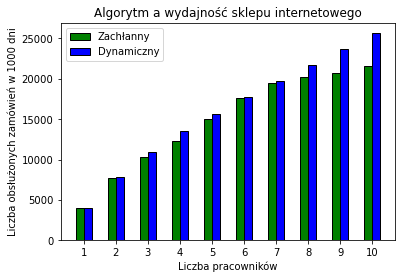

In [81]:
r = np.arange(10) 
width = 0.25    
plt.bar(r, zamówienia_greedy, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Zachłanny')

plt.bar(r + width, zamówienia_dynamic, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Dynamiczny') 
  
plt.xlabel("Liczba pracowników") 
plt.ylabel("Liczba obsłużonych zamówień w 1000 dni") 
plt.title("Algorytm a wydajność sklepu internetowego") 

plt.xticks(r + width/2, ['1','2','3','4', '5', '6', '7', '8', '9', '10']) 
plt.legend() 

plt.show() 

Tak, przy zwiększającej się liczbie pracowników widać coraz bardziej zwiększającą się różnicę.